## Recources
CDE 2024- https://www.srmap.edu.in/cde-2024/ ,
Github link-- https://github.com/CoderOnTheRoad/ML_for_OER_in_SAC


# **Free Energy Calculation for ORR reaction**

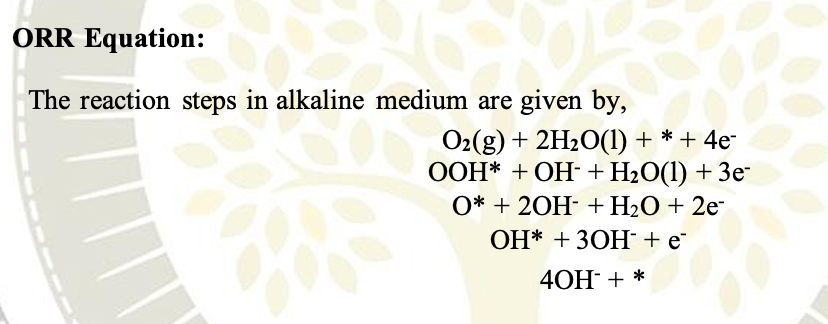

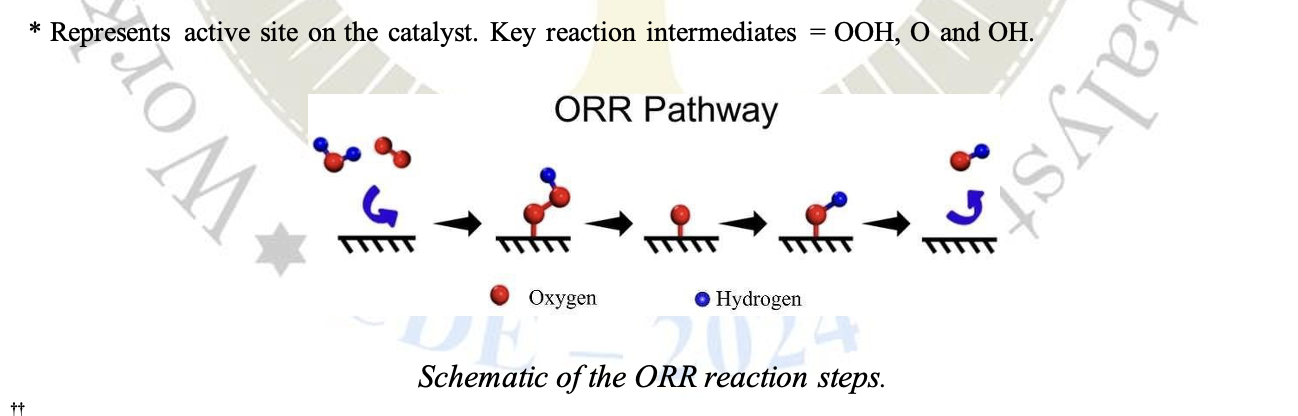

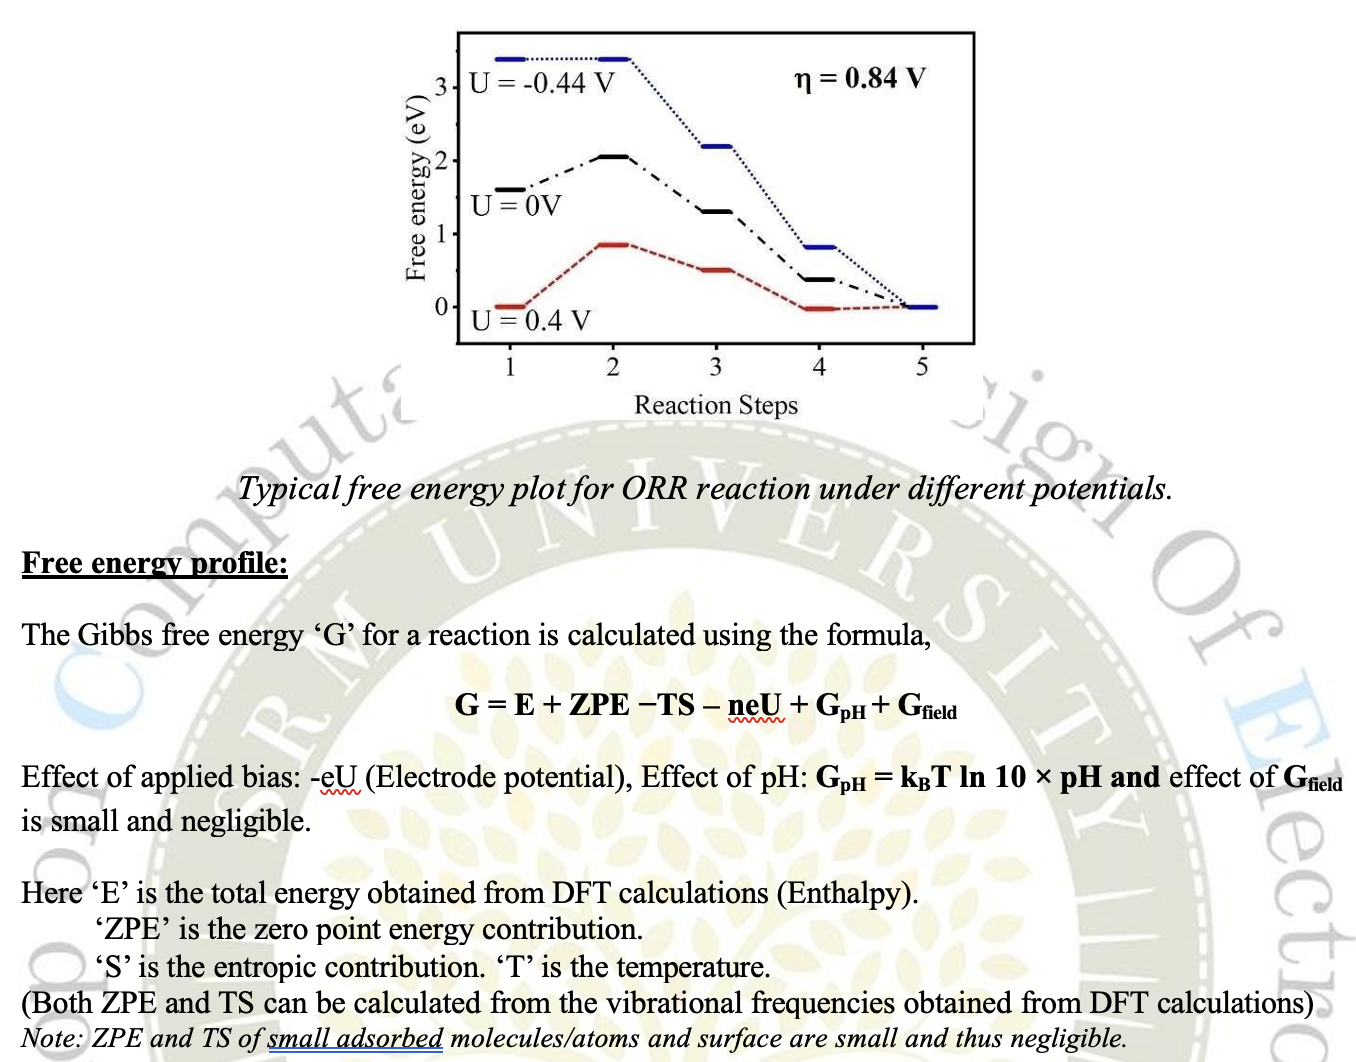

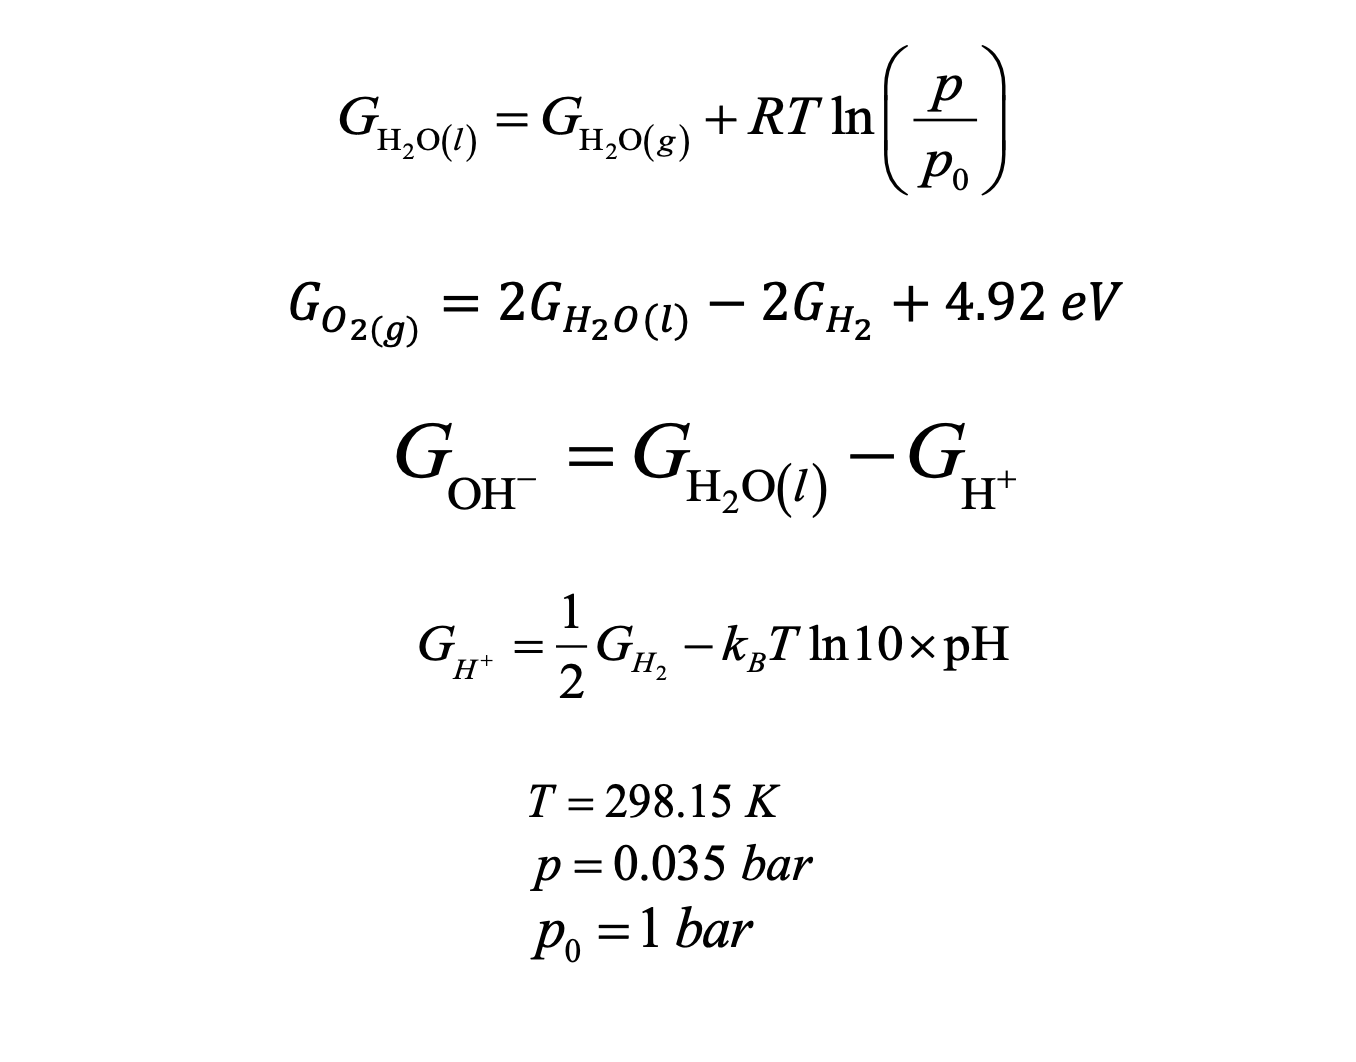

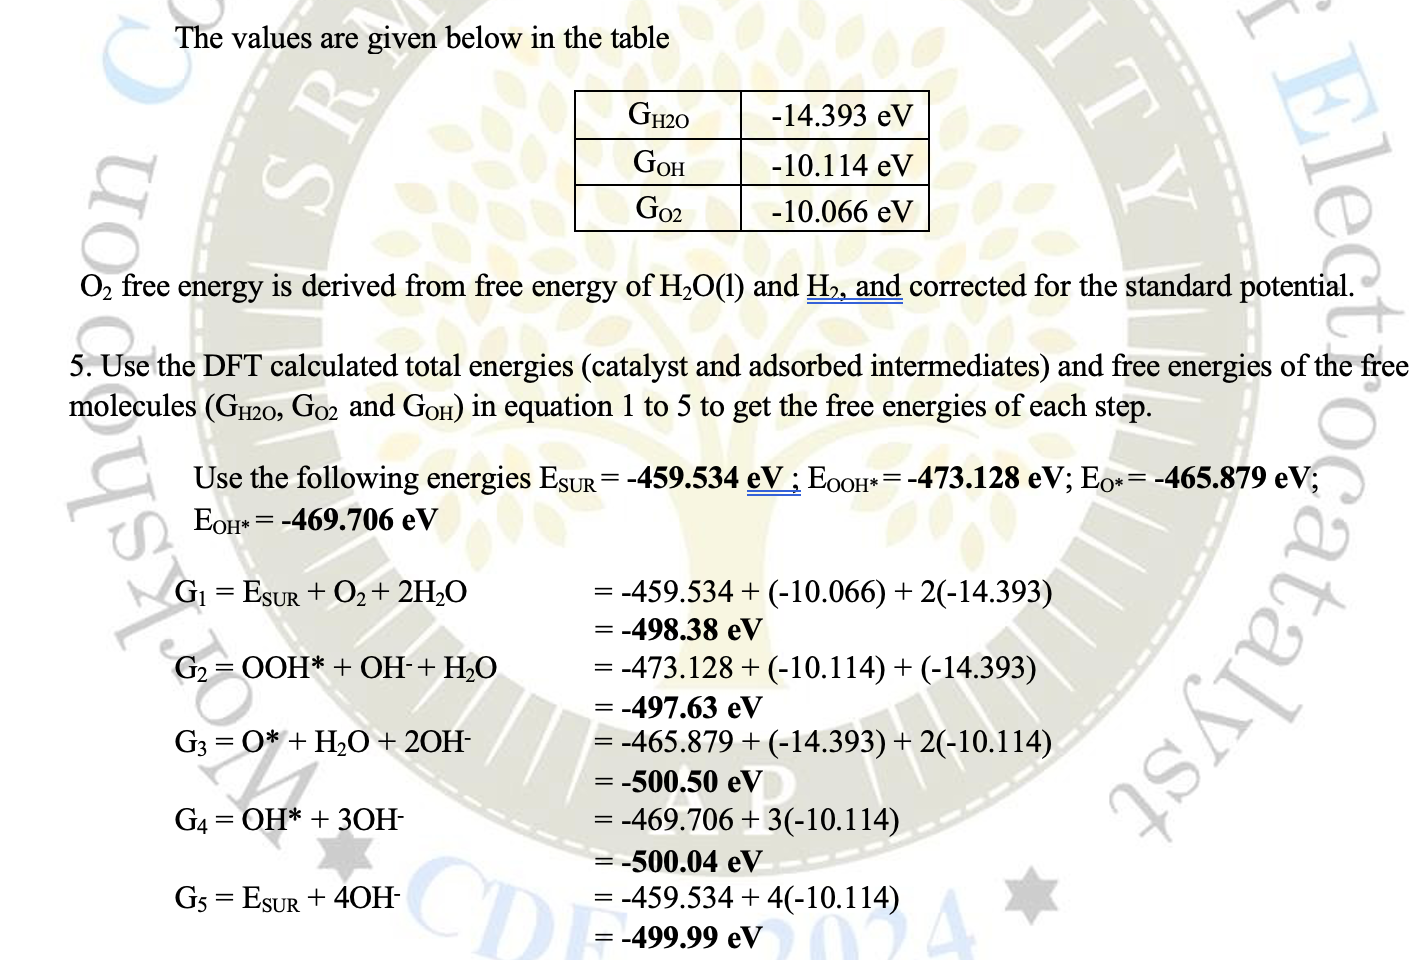

In [ ]:
#Define the energy values
EH2O=-14.393
EOH= -10.114
EO2= -10.066
ESUR=-459.534
EOOH_ads=-473.128
EO_ads=-465.879
EOH_ads=-469.706


In [ ]:
#Calculate the reaction free energies
G1=ESUR+EO2+2*EH2O
G2=EOOH_ads+EOH+EH2O
G3=EO_ads+EH2O+2*EOH
G4=EOH_ads+3*EOH
G5=ESUR+4*EOH

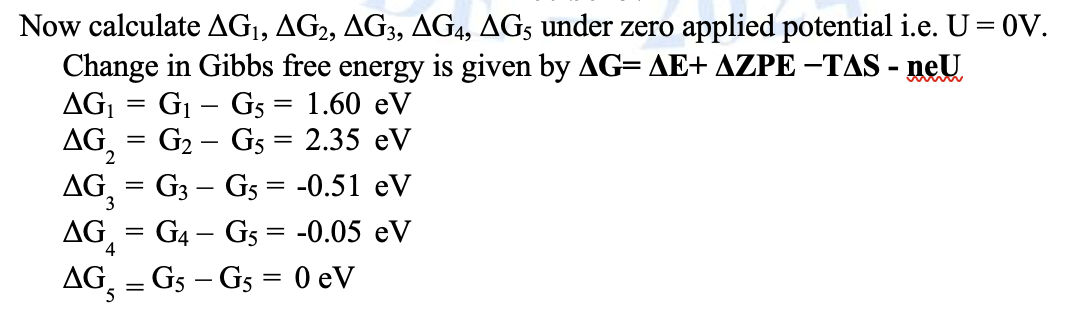

In [ ]:
DG1=G1-G5
DG2=G2-G5
DG3=G3-G5
DG4=G4-G5
DG5=G5-G5
print(f'DG1: {DG1},DG2: {DG2}, DG3: {DG3}, DG4: {DG4}, DG5: {DG5}')

DG1: 1.6040000000000418,DG2: 2.355000000000018, DG3: -0.5100000000000477, DG4: -0.057999999999992724, DG5: 0.0


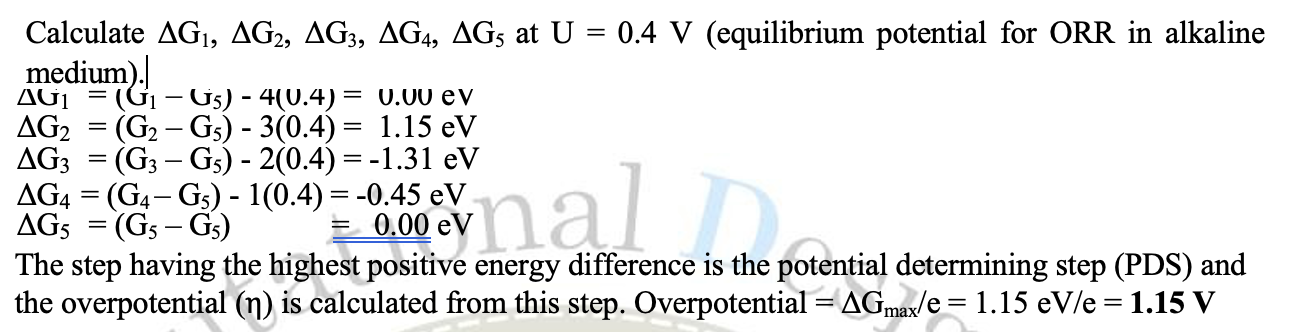

In [ ]:
eqp=0.4
UG1=(G1-G5)-4*(eqp)
UG2=(G2-G5)-3*(eqp)
UG3=(G3-G5)-2*(eqp)
UG4=(G4-G5)-eqp
UG5=(G5-G5)
print(f'UG1: {UG1},UG2: {UG2}, UG3: {UG3}, UG4: {UG4}, UG5: {UG5}')

UG1: 0.004000000000041748,UG2: 1.155000000000018, UG3: -1.3100000000000478, UG4: -0.45799999999999275, UG5: 0.0


In [ ]:
import numpy as np
D_step1=UG2-UG1
D_step2=UG3-UG2
D_step3=UG4-UG3
D_step4=UG5-UG4
overpotential = np.max([D_step1,D_step2,D_step3,D_step4])
print(overpotential)

1.1509999999999763


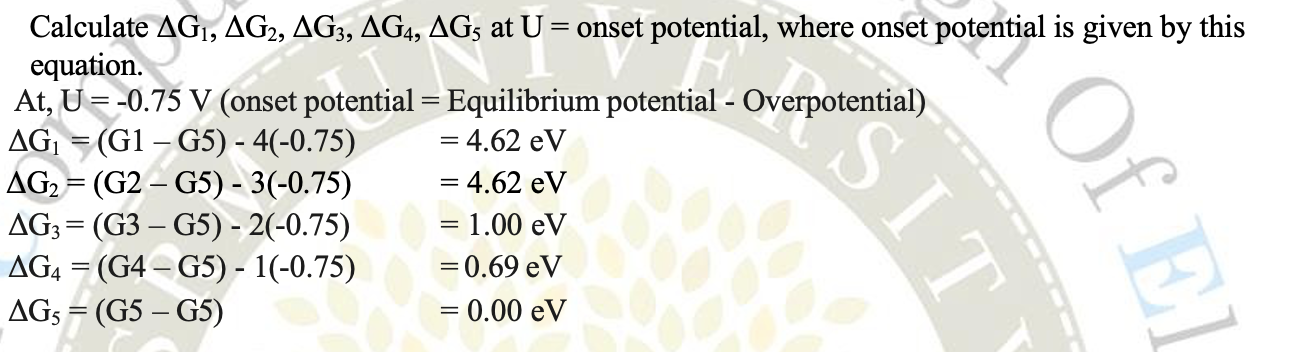

In [ ]:
onset=eqp-overpotential

In [ ]:
OG1=(G1-G5)-4*(onset)
OG2=(G2-G5)-3*(onset)
OG3=(G3-G5)-2*(onset)
OG4=(G4-G5)-onset
OG5=(G5-G5)
print(f'OG1: {OG1},OG2: {OG2}, OG3: {OG3}, OG4: {OG4}, OG5: {OG5}')

OG1: 4.607999999999947,OG2: 4.607999999999947, OG3: 0.9919999999999047, OG4: 0.6929999999999835, OG5: 0.0


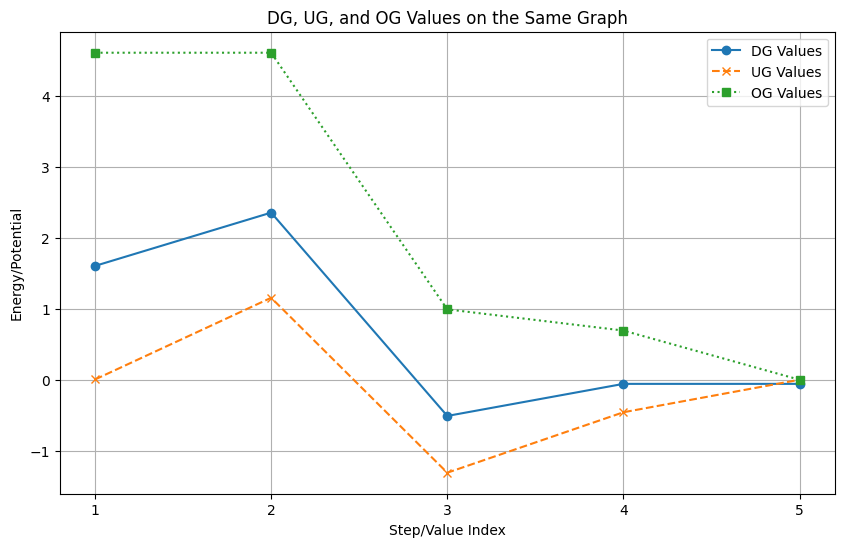

In [ ]:
import matplotlib.pyplot as plt

x_values = [1, 2, 3, 4, 5]

# DG values
DG_values = [DG1, DG2, DG3, DG4, DG4]

# UG values
UG_values = [UG1, UG2, UG3, UG4, UG5]

# OG values
OG_values = [OG1, OG2, OG3, OG4, OG5]

plt.figure(figsize=(10, 6))

plt.plot(x_values, DG_values, marker='o', linestyle='-', label='DG Values')
plt.plot(x_values, UG_values, marker='x', linestyle='--', label='UG Values')
plt.plot(x_values, OG_values, marker='s', linestyle=':', label='OG Values')

plt.xlabel('Step/Value Index')
plt.ylabel('Energy/Potential')
plt.title('DG, UG, and OG Values on the Same Graph')
plt.xticks(x_values)
plt.grid(True)
plt.legend()
plt.show()

# Some Real life DFT data

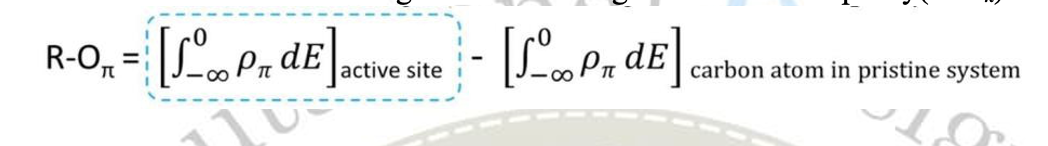

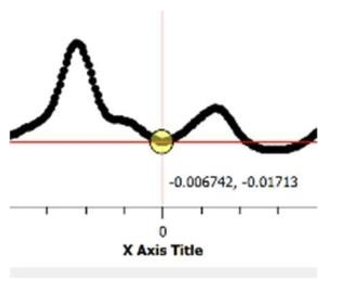

   D(EF)    R_O    GOH
0  0.355  0.092 -0.411
1  0.303  0.066 -0.379
2  0.301  0.088 -0.380
3  0.086  0.069  0.168
4  0.014  0.042  0.673


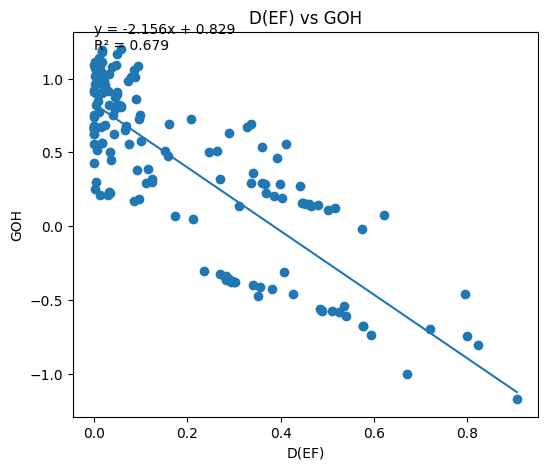


D(EF) vs GOH
Equation: y = -2.1560x + 0.8289
R² = 0.6790


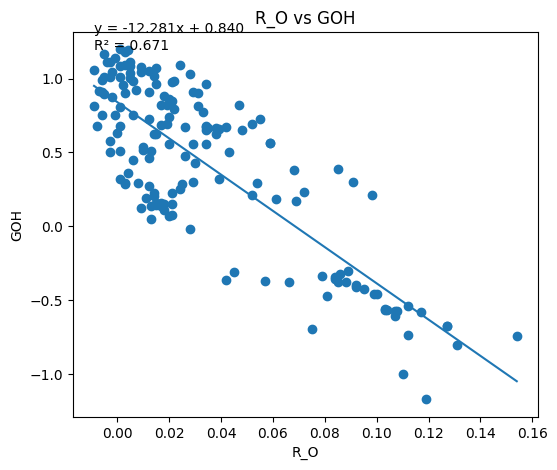


R_O vs GOH
Equation: y = -12.2807x + 0.8401
R² = 0.6713


In [1]:

# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Load CSV file
# Replace with your filename

df = pd.read_csv("orr.csv")

print(df.head())

# Function for linear fit + plot

def linear_fit_plot(x_col, y_col):

    X = df[[x_col]].values
    y = df[y_col].values

    # Fit model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Metrics
    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = r2_score(y, y_pred)

    # Sort for clean line plotting
    sorted_idx = np.argsort(X.flatten())
    X_sorted = X.flatten()[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]

    # Plot
    plt.figure(figsize=(6,5))
    plt.scatter(X, y)
    plt.plot(X_sorted, y_pred_sorted)

    equation_text = f"y = {slope:.3f}x + {intercept:.3f}\nR² = {r2:.3f}"
    plt.text(min(X), max(y), equation_text)

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{x_col} vs {y_col}")
    plt.show()

    print(f"\n{x_col} vs {y_col}")
    print(f"Equation: y = {slope:.4f}x + {intercept:.4f}")
    print(f"R² = {r2:.4f}")


# Plot 1: D(EF) vs GOH

linear_fit_plot("D(EF)", "GOH")


# Plot 2: R_O vs GOH

linear_fit_plot("R_O", "GOH")